<a href="https://colab.research.google.com/github/NandiniMehta0603/Tensorflow/blob/main/Computer_Vision_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Convolutional neural netwroks and computer vision*

Computer vision is a practice pf writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the car in the front.

##get the data
The images we are workign with are from the Food101 dataset (101 different classes of food)
However we have modified it to use only 2 classes using the image data modification

**Note** we start with a smaller dataset so that we can experiment quickly ans figure what works (or better yet what doesn't work) before sclaing up

In [1]:
import zipfile

# ie get this file download here

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-04-05 17:20:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0d::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   134MB/s    in 0.8s    

2023-04-05 17:20:13 (134 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



##Inspect the data (become one with it)
Very crucial step at the beginning of any ML project is becoming one with the data.

And for a computer vision project..this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os

#walk through the pizza_steak directory and list number of files 
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
  

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
#The extra file in pizza_streak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Apr  5 17:20 .
drwxr-xr-x 1 root root 4096 Apr  5 17:20 ..
drwxr-xr-x 4 root root 4096 Apr  5 17:20 test
drwxr-xr-x 4 root root 4096 Apr  5 17:20 train


In [7]:
#Another way to find how many images are in a file
num_steak_images_train=len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualise the images, lets first get the class names programmatically

In [10]:
#Get the classnames programmatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")])) #created a list of class_names from the subdirectory
# class_names=class_names[1:]-->to remove DS Store if you have 
print(class_names)

['pizza' 'steak']


In [11]:
#Lets visualise the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class): #in string format
  #set up the target directory
  target_folder=target_dir+target_class

  #get a random image path
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  #read in the image and plot it using matplotlib
  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: { img.shape}")#show the shape of the image

  return img


['395960.jpg']
Image shape: (384, 512, 3)


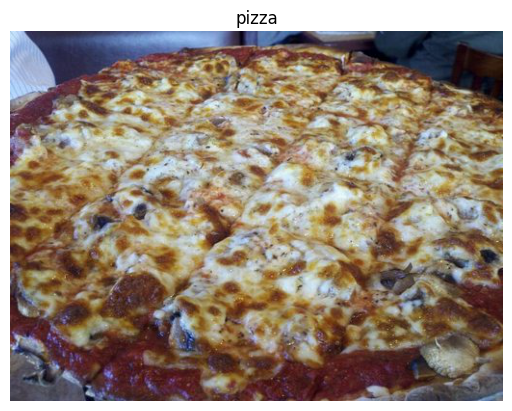

In [13]:
#view a random image from the training dataset
img=view_random_image(target_dir="pizza_steak/train/",
                      target_class="pizza")


In [15]:
# img #represented as a tensor

import tensorflow as tf
tf.constant(img) #so here we are converting our image as tensor to work as a feasible input

#the images we have imported and plotted are actually giant arrays/tensors of different pixel values 


<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[171, 201, 225],
        [192, 222, 246],
        [196, 226, 252],
        ...,
        [ 39,  68,  86],
        [ 38,  69,  87],
        [ 38,  69,  87]],

       [[186, 216, 240],
        [178, 208, 232],
        [189, 219, 245],
        ...,
        [ 40,  69,  87],
        [ 39,  70,  88],
        [ 39,  70,  88]],

       [[196, 226, 250],
        [177, 207, 231],
        [181, 211, 237],
        ...,
        [ 42,  71,  89],
        [ 43,  72,  90],
        [ 42,  73,  91]],

       ...,

       [[ 63,  61,  74],
        [ 62,  60,  73],
        [ 62,  60,  73],
        ...,
        [105, 112, 122],
        [105, 109, 120],
        [104, 106, 118]],

       [[ 63,  61,  74],
        [ 63,  61,  74],
        [ 62,  60,  73],
        ...,
        [115, 115, 123],
        [115, 114, 122],
        [115, 112, 119]],

       [[ 63,  61,  74],
        [ 63,  61,  74],
        [ 63,  61,  74],
        ...,
        [118, 115, 12

In [16]:
#view the image shape
img.shape #returns the width,height,color channels

(384, 512, 3)

In [17]:
#get all the pixel values between 0 and 1-->scaling/normalization
img/255

array([[[0.67058824, 0.78823529, 0.88235294],
        [0.75294118, 0.87058824, 0.96470588],
        [0.76862745, 0.88627451, 0.98823529],
        ...,
        [0.15294118, 0.26666667, 0.3372549 ],
        [0.14901961, 0.27058824, 0.34117647],
        [0.14901961, 0.27058824, 0.34117647]],

       [[0.72941176, 0.84705882, 0.94117647],
        [0.69803922, 0.81568627, 0.90980392],
        [0.74117647, 0.85882353, 0.96078431],
        ...,
        [0.15686275, 0.27058824, 0.34117647],
        [0.15294118, 0.2745098 , 0.34509804],
        [0.15294118, 0.2745098 , 0.34509804]],

       [[0.76862745, 0.88627451, 0.98039216],
        [0.69411765, 0.81176471, 0.90588235],
        [0.70980392, 0.82745098, 0.92941176],
        ...,
        [0.16470588, 0.27843137, 0.34901961],
        [0.16862745, 0.28235294, 0.35294118],
        [0.16470588, 0.28627451, 0.35686275]],

       ...,

       [[0.24705882, 0.23921569, 0.29019608],
        [0.24313725, 0.23529412, 0.28627451],
        [0.24313725, 0

in order to process all the images simultaneously-->tensorflow provides a good method

**Note** Many ML models including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with iamges is to scale (also referred to as normalise) their pixel values by dividing the image arrays by 255 (since 255 is the maxi pixel value)

##An end to end example
let's build a convolutional neural network to find patterns in the iamges, more specifically we need a way to:
* Load the images
* Preprocess the images
* BUild a CNN to find patterns in the images
* Compile the CNN
* Fit the CNN to our training data

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#preprocess data (get all of the pixel values between 0 and 1, also called as scaling/normalizing)
train_datagen=ImageDataGenerator(rescale=1./255) 
#generates batches of tensor image data with real time data augmentation
valid_datagen=ImageDataGenerator(rescale=1./255)

#setup paths to our data directories
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

#import data from the directories and turn it into batches-->preprocess it
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224), #in our case, we want all our images to be reshaped to this shape-->common shape-->stores optimal amount of info about an image
                                             class_mode="binary",
                                             seed=42 #for reproducibility
                                             )

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

#build a CNN model 
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the CNN model
model_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

#fit the model
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 132s 3s/step - loss: 0.5852 - accuracy: 0.6973 - val_loss: 0.3993 - val_accuracy: 0.8180
Epoch 2/5
 6/47 [==>...........................] - ETA: 1:34 - loss: 0.4814 - accuracy: 0.7656

KeyboardInterrupt: ignored

this ETA is taking so long bec we are not using a hardware acceleration-->change it to GPU-->it runs much faster

In [19]:
len(train_data) #1500/32 -->the reason we put all of our images into batches is so that all could be stored in the memory

47